<a href="https://colab.research.google.com/github/Siri2191/study_area/blob/main/ML_Otimiza%C3%A7%C3%A3o_de_modelos_atrav%C3%A9s_de_Hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install graphviz==0.9
#!pip install pydot

#!apt-get install  graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.


# Relembrando os passos do Cross Validation

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head() 

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [ ]:
# criando um classificador dummy para usar a accuracy de reeferencia

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo,
                         x_azar, 
                         y_azar, 
                         cv = 10,
                         return_train_score=False)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [ ]:
# criando o modelo com o decisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, 
                         x_azar, 
                         y_azar, 
                         cv = 10, 
                         return_train_score=False)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [ ]:
# criando a coluna do modelo do carro

dados['modelo'] = np.random.randint(-2,3,len(dados['idade_do_modelo']))+ dados.idade_do_modelo
dados.modelo = dados.modelo + abs(dados.modelo.min())+1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,22
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,12
3,95276.14,0,3,43167.32682,3
4,117384.68,1,4,12770.11290,4


In [ ]:
# criando uma função para imprimir os resultados

def imprime_resultados(results):
  media = results['test_score'].mean()*100
  desvio_padrao = results['test_score'].std()*100
  print('Accuracy médio %.2f %%' % media)
  print('O intervalo: [ %.2f , %.2f ] %%' % ((media - 2*desvio_padrao),(media + 2*desvio_padrao)))

In [ ]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

NameError: ignored

In [ ]:
# utilizando o GoupKfold para analisar como o modelo se comporta com um novo modelo

from sklearn.model_selection import GroupKFold

SEED =301
np.random.seed(SEED)

cv = GroupKFold( n_splits = 10 )
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo,
                         x_azar,
                         y_azar,
                         cv = cv,
                         groups = dados.modelo,
                         return_train_score = False)
imprime_resultados(results)

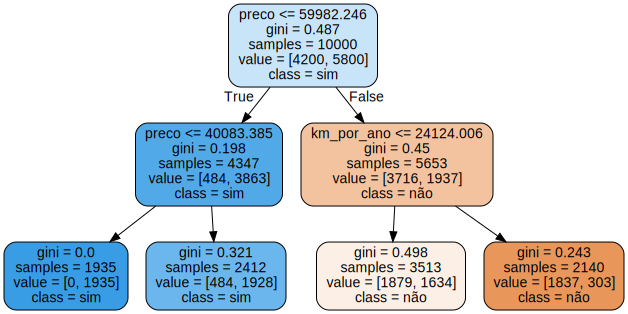

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# aumentando os passo da arvore de decisão

from sklearn.model_selection import GroupKFold

SEED =301
np.random.seed(SEED)

cv = GroupKFold( n_splits = 10 )
modelo = DecisionTreeClassifier(max_depth = 3)
results = cross_validate(modelo,
                         x_azar,
                         y_azar,
                         cv = cv,
                         groups = dados.modelo,
                         return_train_score = False)
imprime_resultados(results)

Accuracy médio 78.67 %
O intervalo: [ 76.40 , 80.94 ] %


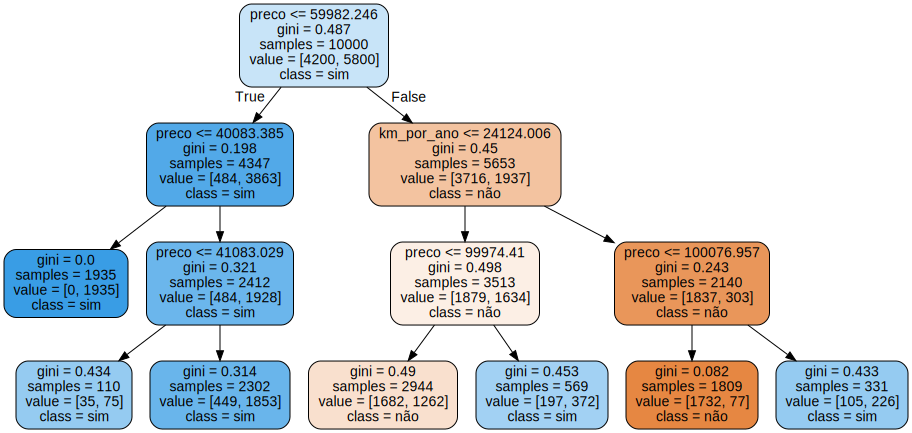

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

**Algoritmos como o Decision tree e o SVC possuem parametros que tem que ser fornecidos antes do treino com o dados, esse tipo de paramatro é chamado de HIperparametros**

# Alterando os hiperparametros da DecisionTree 


In [ ]:
def roda_arvore_de_decisao(max_depth):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo,
                           x_azar,
                           y_azar,
                           cv = cv,
                           groups = dados.modelo,
                           return_train_score = False)
  
  print('Arvore Max_depth = %d, media = %.2f %%' % (max_depth, results['test_score'].mean()*100))

for i in range(1,30):
  roda_arvore_de_decisao(i)

Arvore Max_depth = 1, media = 75.79 %
Arvore Max_depth = 2, media = 75.79 %
Arvore Max_depth = 3, media = 78.69 %
Arvore Max_depth = 4, media = 78.67 %
Arvore Max_depth = 5, media = 78.60 %
Arvore Max_depth = 6, media = 78.39 %
Arvore Max_depth = 7, media = 78.31 %
Arvore Max_depth = 8, media = 78.20 %
Arvore Max_depth = 9, media = 77.99 %
Arvore Max_depth = 10, media = 77.41 %
Arvore Max_depth = 11, media = 77.09 %
Arvore Max_depth = 12, media = 76.53 %
Arvore Max_depth = 13, media = 76.38 %
Arvore Max_depth = 14, media = 75.98 %
Arvore Max_depth = 15, media = 75.58 %
Arvore Max_depth = 16, media = 75.04 %
Arvore Max_depth = 17, media = 74.63 %
Arvore Max_depth = 18, media = 74.42 %
Arvore Max_depth = 19, media = 73.71 %
Arvore Max_depth = 20, media = 73.60 %
Arvore Max_depth = 21, media = 73.35 %
Arvore Max_depth = 22, media = 73.26 %
Arvore Max_depth = 23, media = 73.30 %
Arvore Max_depth = 24, media = 72.98 %
Arvore Max_depth = 25, media = 72.87 %
Arvore Max_depth = 26, media = 72.

Comparando os resultado de treino com o de teste com a variação da max_depht

In [ ]:
def roda_arvore_de_decisao(max_depth):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo,
                           x_azar,
                           y_azar,
                           cv = cv,
                           groups = dados.modelo,
                           return_train_score = True)
  
  print('Arvore Max_depth = %d, treino = %.2f %% , teste = %.2f %%' 
        % (max_depth,results['train_score'].mean()*100, results['test_score'].mean()*100))

for i in range(1,30):
  roda_arvore_de_decisao(i)

Arvore Max_depth = 1, treino = 75.79 % , teste = 75.79 %
Arvore Max_depth = 2, treino = 75.79 % , teste = 75.79 %
Arvore Max_depth = 3, treino = 78.76 % , teste = 78.69 %
Arvore Max_depth = 4, treino = 78.79 % , teste = 78.67 %
Arvore Max_depth = 5, treino = 78.95 % , teste = 78.60 %
Arvore Max_depth = 6, treino = 79.17 % , teste = 78.39 %
Arvore Max_depth = 7, treino = 79.45 % , teste = 78.31 %
Arvore Max_depth = 8, treino = 79.84 % , teste = 78.20 %
Arvore Max_depth = 9, treino = 80.31 % , teste = 77.99 %
Arvore Max_depth = 10, treino = 80.95 % , teste = 77.41 %
Arvore Max_depth = 11, treino = 81.77 % , teste = 77.09 %
Arvore Max_depth = 12, treino = 82.76 % , teste = 76.53 %
Arvore Max_depth = 13, treino = 83.71 % , teste = 76.38 %
Arvore Max_depth = 14, treino = 84.74 % , teste = 75.98 %
Arvore Max_depth = 15, treino = 85.81 % , teste = 75.58 %
Arvore Max_depth = 16, treino = 86.87 % , teste = 75.04 %
Arvore Max_depth = 17, treino = 87.96 % , teste = 74.63 %
Arvore Max_depth = 18, 

retorrnando valores numa tabela

In [ ]:
def roda_arvore_de_decisao(max_depth):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo,
                           x_azar,
                           y_azar,
                           cv = cv,
                           groups = dados.modelo,
                           return_train_score = True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print('Arvore Max_depth = %d, treino = %.2f %% , teste = %.2f %%' 
        % (max_depth,train_score, test_score))
  tabela = [max_depth, train_score,test_score ]
  return tabela

[roda_arvore_de_decisao(i) for i in range(1,33)]

Arvore Max_depth = 1, treino = 75.79 % , teste = 75.79 %
Arvore Max_depth = 2, treino = 75.79 % , teste = 75.79 %
Arvore Max_depth = 3, treino = 78.76 % , teste = 78.69 %
Arvore Max_depth = 4, treino = 78.79 % , teste = 78.67 %
Arvore Max_depth = 5, treino = 78.95 % , teste = 78.60 %
Arvore Max_depth = 6, treino = 79.17 % , teste = 78.39 %
Arvore Max_depth = 7, treino = 79.45 % , teste = 78.31 %
Arvore Max_depth = 8, treino = 79.84 % , teste = 78.20 %
Arvore Max_depth = 9, treino = 80.31 % , teste = 77.99 %
Arvore Max_depth = 10, treino = 80.95 % , teste = 77.41 %
Arvore Max_depth = 11, treino = 81.77 % , teste = 77.09 %
Arvore Max_depth = 12, treino = 82.76 % , teste = 76.53 %
Arvore Max_depth = 13, treino = 83.71 % , teste = 76.38 %
Arvore Max_depth = 14, treino = 84.74 % , teste = 75.98 %
Arvore Max_depth = 15, treino = 85.81 % , teste = 75.58 %
Arvore Max_depth = 16, treino = 86.87 % , teste = 75.04 %
Arvore Max_depth = 17, treino = 87.96 % , teste = 74.63 %
Arvore Max_depth = 18, 

[[1, 75.79117792027954, 75.7855528322827],
 [2, 75.79117792027954, 75.7855528322827],
 [3, 78.75570174582634, 78.69217035003693],
 [4, 78.7879039539113, 78.67230549023454],
 [5, 78.9490088252396, 78.60314032634322],
 [6, 79.17347161164876, 78.39176458197532],
 [7, 79.45020449672501, 78.31065920638183],
 [8, 79.8424568932069, 78.20099363037546],
 [9, 80.30571313094171, 77.99390890417402],
 [10, 80.94924755329801, 77.40848386902091],
 [11, 81.7734931563875, 77.08525864527348],
 [12, 82.75773261158028, 76.52985521621395],
 [13, 83.7141922943013, 76.37934117171254],
 [14, 84.73608916755252, 75.97722756454168],
 [15, 85.80834667973353, 75.58218058656212],
 [16, 86.86922516109573, 75.04012504111095],
 [17, 87.96031455992747, 74.63096019807425],
 [18, 89.07138272611617, 74.42186225161885],
 [19, 90.0368171059481, 73.71249188473882],
 [20, 91.01126118777788, 73.60058573779165],
 [21, 91.88803086528097, 73.34671620227857],
 [22, 92.77593188201074, 73.264550584826],
 [23, 93.56818760390368, 73.3

In [ ]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth,train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.79
Arvore max_depth = 2, treino = 75.79, teste = 75.79
Arvore max_depth = 3, treino = 78.76, teste = 78.69
Arvore max_depth = 4, treino = 78.79, teste = 78.67
Arvore max_depth = 5, treino = 78.95, teste = 78.60
Arvore max_depth = 6, treino = 79.17, teste = 78.39
Arvore max_depth = 7, treino = 79.45, teste = 78.31
Arvore max_depth = 8, treino = 79.84, teste = 78.20
Arvore max_depth = 9, treino = 80.31, teste = 77.99
Arvore max_depth = 10, treino = 80.95, teste = 77.41
Arvore max_depth = 11, treino = 81.77, teste = 77.09
Arvore max_depth = 12, treino = 82.76, teste = 76.53
Arvore max_depth = 13, treino = 83.71, teste = 76.38
Arvore max_depth = 14, treino = 84.74, teste = 75.98
Arvore max_depth = 15, treino = 85.81, teste = 75.58
Arvore max_depth = 16, treino = 86.87, teste = 75.04
Arvore max_depth = 17, treino = 87.96, teste = 74.63
Arvore max_depth = 18, treino = 89.07, teste = 74.42
Arvore max_depth = 19, treino = 90.04, teste = 73.71
Ar

,max_depth,train,test
0,1,75.791178,75.785553
1,2,75.791178,75.785553
2,3,78.755702,78.692170
3,4,78.787904,78.672305
4,5,78.949009,78.603140


# Vizualizando o OVERFIT: Treino quase perfeito, teste ruim. Vulgo treinou demais

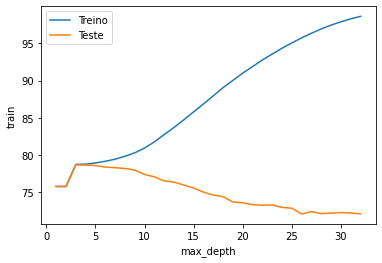

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data = resultados, x = 'max_depth', y = 'train')
sns.lineplot(data = resultados, x = 'max_depth', y = 'test')
plt.legend(['Treino','Teste'])

In [ ]:
resultados.sort_values('test', ascending = False).head()

,max_depth,train,test
2,3,78.755702,78.692170
3,4,78.787904,78.672305
4,5,78.949009,78.603140
5,6,79.173472,78.391765
6,7,79.450204,78.310659


**Os melhores resultados de de teste são para 3 passos**

# Explorando Hipermarametros com duas dimensões

In [ ]:
# criando e testando uma função para testar 2 hiperparametros

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo,
                           x_azar,
                           y_azar,
                           cv = cv,
                           groups = dados.modelo,
                           return_train_score = True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f"
   % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf,train_score,test_score ]
  return tabela

# função para fzer o range para cada valor dos hiperparametnros e coloca rnuma tabla
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in range(1,33):
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 1, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 2, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 3, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 4, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 5, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 6, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 7, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 8, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 9, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 10, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 11, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 12, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 13, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_

,max_depth,min_samples_leaf,train,test
0,1,1,75.791178,75.785553
1,1,2,75.791178,75.785553
2,1,3,75.791178,75.785553
3,1,4,75.791178,75.785553
4,1,5,75.791178,75.785553


In [ ]:
# fazendo para alguns valores soltos de min_sample_leaf

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo,
                           x_azar,
                           y_azar,
                           cv = cv,
                           groups = dados.modelo,
                           return_train_score = True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f"
   % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf,train_score,test_score ]
  return tabela

# função para fzer o range para cada valor dos hiperparametnros e coloca rnuma tabla
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [14,64,128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 14, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 14, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.79
Arvore max_depth = 3, min_samples_leaf = 14, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.70
Arvore max_depth = 4, min_samples_leaf = 14, treino = 78.75, teste = 78.56
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
0,1,14,75.791178,75.785553
1,1,64,75.791178,75.785553
2,1,128,75.791178,75.785553
3,1,256,75.791178,75.785553
4,2,14,75.791178,75.785553


In [ ]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.751263,78.702282
15,4,256,78.751263,78.702282
14,4,128,78.751263,78.702282
13,4,64,78.751263,78.702282
8,3,14,78.751263,78.702282


# Correlação entre hiperparamaetros

In [ ]:
corr= resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-1.316226e-16,0.494335,-0.142263
min_samples_leaf,-1.316226e-16,1.000000e+00,-0.507418,0.598800
train,4.943354e-01,-5.074177e-01,1.000000,-0.493065
test,-1.422626e-01,5.987996e-01,-0.493065,1.000000


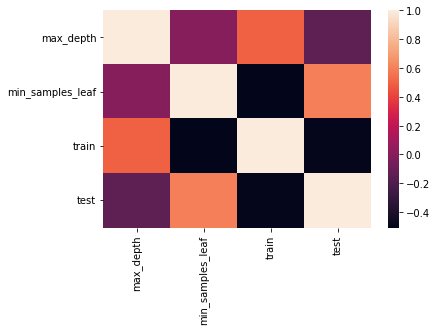

In [ ]:
sns.heatmap(corr)

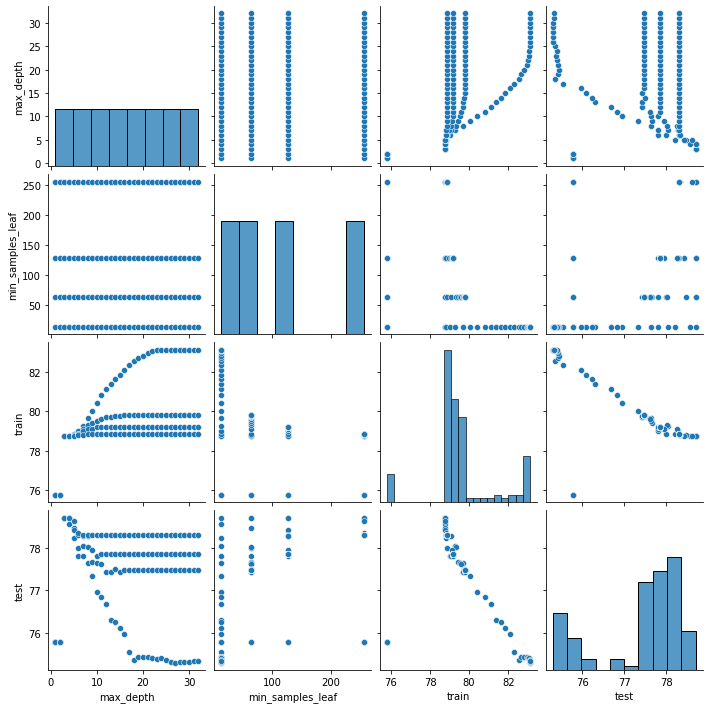

In [ ]:
sns.pairplot(resultados)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


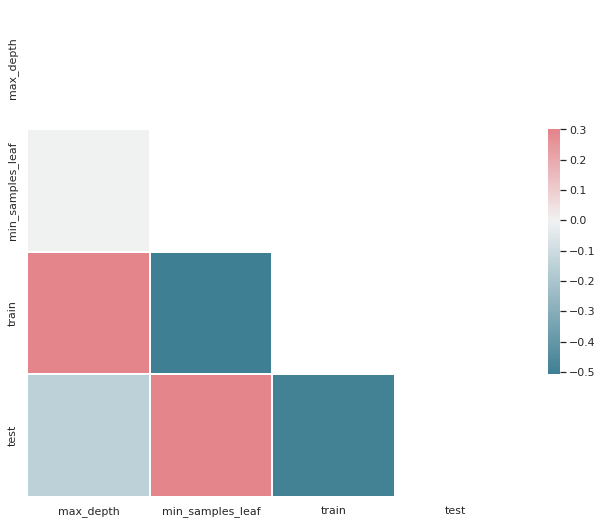

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Aparentemente, de acorod com as matrizes de correlação pode existir um melhor resultado nos valoresa acima de 128 para o min_semple, por isto refaz os a busca() mas para outros valores **

In [ ]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128,192, 256,512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.79
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.79
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.79
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.70
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.48
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.70
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.791178,75.785553
1,1,192,75.791178,75.785553
2,1,256,75.791178,75.785553
3,1,512,75.791178,75.785553
4,2,128,75.791178,75.785553


In [ ]:
corr = resultados.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


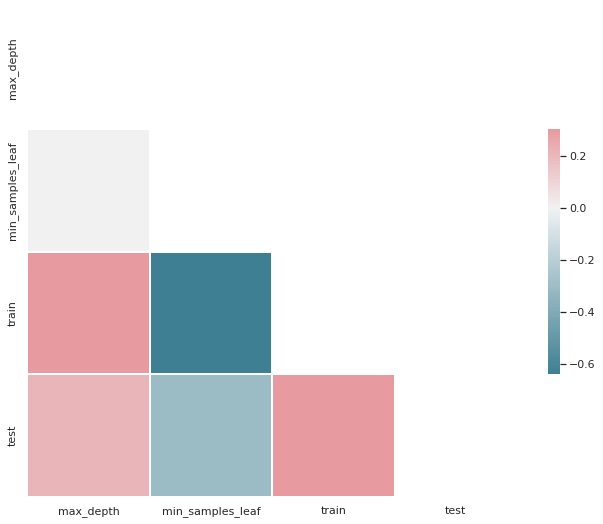

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Houve uma alteração na correlação apra esta nov faixa de valores do min_sample**

In [ ]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
14,4,256,78.751263,78.702282
8,3,128,78.751263,78.702282
9,3,192,78.751263,78.702282
10,3,256,78.751263,78.702282
12,4,128,78.751263,78.702282


# Explorando hipermarametros com 3 dimensooes

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, 
                                  min_samples_leaf = min_samples_leaf, 
                                  min_samples_split = min_samples_split)
  results = cross_validate(modelo, 
                           x_azar, 
                           y_azar, 
                           cv = cv, 
                           groups = dados.modelo, 
                           return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test
0,1,32,32,75.791178,75.785553
1,1,32,64,75.791178,75.785553
2,1,32,128,75.791178,75.785553
3,1,32,256,75.791178,75.785553
4,1,64,32,75.791178,75.785553


In [ ]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,test
max_depth,1.000000e+00,1.300685e-16,4.182375e-16,0.534455,0.036691
min_samples_leaf,1.300685e-16,1.000000e+00,0.000000e+00,-0.358084,0.403634
min_samples_split,4.182375e-16,0.000000e+00,1.000000e+00,-0.106862,0.162823
train,5.344547e-01,-3.580836e-01,-1.068618e-01,1.000000,0.259870
test,3.669074e-02,4.036335e-01,1.628229e-01,0.259870,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


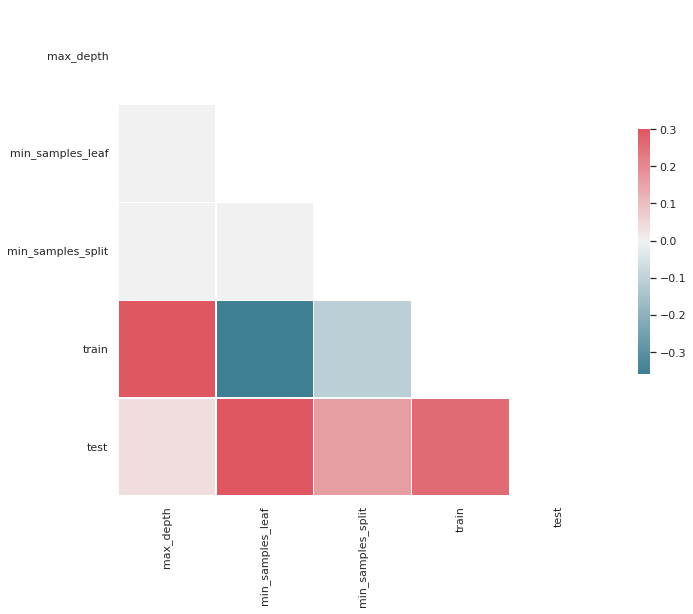

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**A correlação do trein com max_depth é positiva, a correlação do  train com min_sample e min_sample_split é negativa e o teste com min_sample é positiva**

In [ ]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test
48,4,32,32,78.751263,78.702282
33,3,32,64,78.751263,78.702282
52,4,64,32,78.751263,78.702282
51,4,32,256,78.751263,78.702282
50,4,32,128,78.751263,78.702282


**Um criterio muito importante de avlaiação do algorimtico é o tempo que ele leva para rodar o cross validation. podemos acrescentar isto na tabela resultados redefindo algumas coisas na nossa função.**

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, 
                                  min_samples_leaf = min_samples_leaf, 
                                  min_samples_split = min_samples_split)
  results = cross_validate(modelo, 
                           x_azar, 
                           y_azar, 
                           cv = cv, 
                           groups = dados.modelo, 
                           return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  tabela = [max_depth,
            min_samples_leaf, 
            min_samples_split, 
            train_score, 
            test_score,
            fit_time,
            score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf",
                                                  "min_samples_split", "train","test",
                                                  'fit_time', 'score_time'])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006133,0.001874
1,1,32,64,75.791169,75.784219,0.005762,0.001676
2,1,32,128,75.791169,75.784219,0.005973,0.001770
3,1,32,256,75.791169,75.784219,0.006578,0.002238
4,1,64,32,75.791169,75.784219,0.006659,0.002060


In [ ]:
corr =  resultados.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


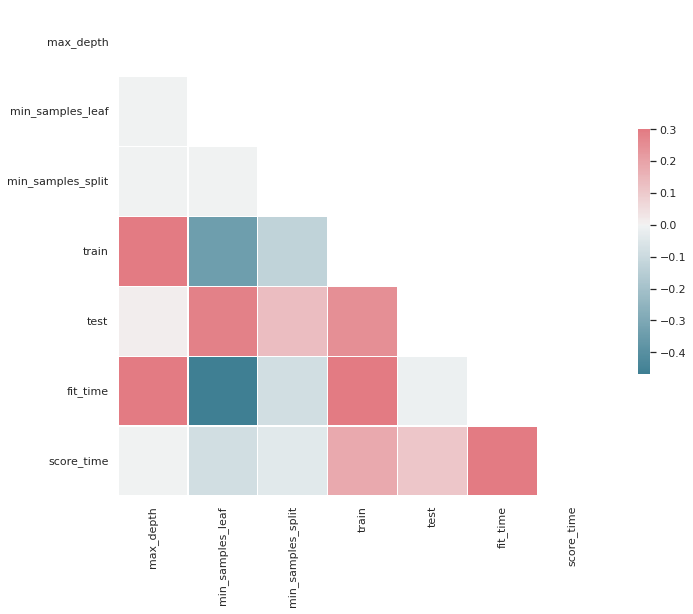

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.013068,0.002138
48,4,32,32,78.750993,78.672633,0.012967,0.002059
34,3,32,128,78.750993,78.672633,0.011196,0.010937
35,3,32,256,78.750993,78.672633,0.011186,0.002121
36,3,64,32,78.750993,78.672633,0.011056,0.002005


# Otimizando a escolha de hiperparamatreo com GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import GridSearchCV


SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041730,0.014318,0.007669,0.005642,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.026069,0.013476,0.005145,0.004759,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011306,0.000249,0.002163,0.000063,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.012015,0.001540,0.002265,0.000205,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011200,0.000163,0.002368,0.000551,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
print(busca.best_params_)
print(busca.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
0.7867263337284333


In [ ]:
# pegando o melhor modelo

melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:
#aplicando o melhor modelo e vendo a acuracya

from sklearn.metrics import accuracy_score

#Evita-se esse tipo de aboradgem na predição de dados reais pois é uma aboradagem viciada e muito otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes,y_azar)*100
print('Accuracy para os dados foi %.2f %%' %accuracy)

Accuracy para os dados foi 78.75 %


# Utilizando o NESTED CROSS VALIDATION e validando o melhor modelo

**Como ter uma estimativa sem vicio nos dados já vistos:**

No caso do CrossValidation com busca de hiperparametros, fazemos uma nova validação cruzada. CHma-se NestedCrossValidation

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score( busca,
                    x_azar,
                    y_azar,
                    cv = GroupKFold(n_splits = 10),
                    groups = dados.modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/

**ainda não é possivel fazer o nested validation comgroupKfold, por isso vamos trocar a validação pelo Kfold normal.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015582,0.001607,0.007311,0.004693,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.020653,0.008866,0.003908,0.000107,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.015285,0.001313,0.005277,0.002651,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.014492,0.000437,0.003660,0.000196,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.014421,0.000215,0.003866,0.000109,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
  

In [ ]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


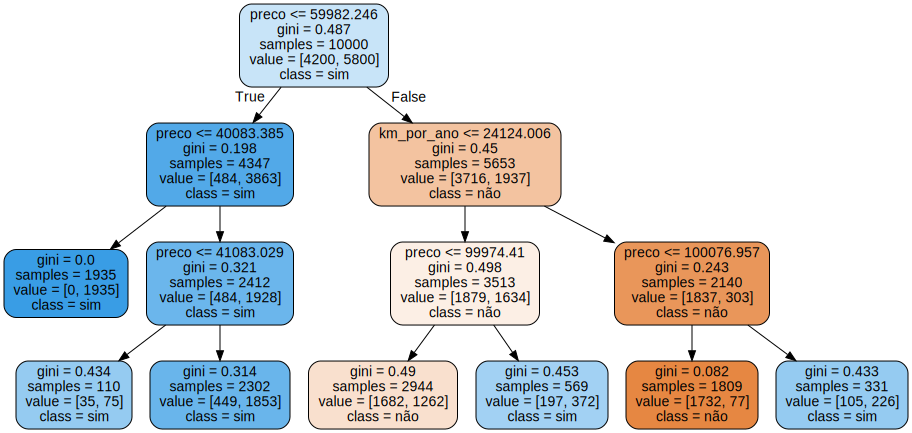

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Otimização na busca dos melhores valores de hiperparametros

Na busca do melhor conjunto que paramaetros que torna mais eficiente nosso algoritmio podemos utilizar dois metodos:

o metodo com grid, buscando cada conjuntos da hiperparametros do espaço de hipeparmateros possiveis. Desta forma varremos todo os conjuntos de possivbilidades porem leva muito tempo parta rodar quando há um grande conjunto de dados. é possivel paralelismo.

metodo random, busca aleatoriamente conjuntos de hiperparametros no espçao de hiperparametros, não varre o espaço todo, mas leva menos tmepo, é possivel paralelislmo e possiveis otimizações dessa busca


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 16,
                    cv = KFold(n_splits = 5, shuffle=True), random_state= SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022983,0.006453,0.004053,0.000272,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,0.769,0.7985,0.793,0.7730,0.7835,0.011278,13
1,0.014748,0.000258,0.003843,0.000240,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
2,0.014900,0.000241,0.003781,0.000247,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.032441,0.006390,0.005290,0.002875,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7
4,0.032170,0.003994,0.003814,0.000078,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7825, 0.783 , 0.794 , 0.781 , 0.795 ])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
  

In [ ]:
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49, 79.93]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


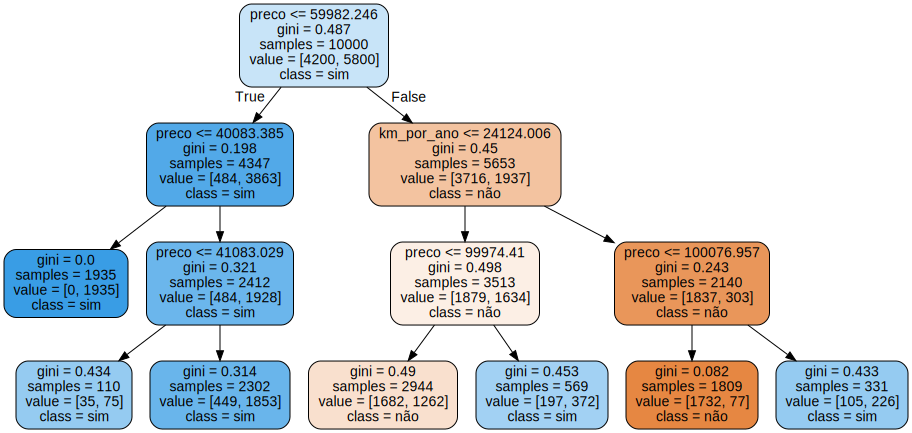

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Customizando o espaço de hiperparamaetros

In [ ]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 20, 30, None],
    "min_samples_split": randint(32,128),
    "min_samples_leaf": randint(32,128),
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 16,
                    cv = KFold(n_splits = 5, shuffle=True), random_state= SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025249,0.005414,0.004330,0.000656,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.039067,0.006451,0.006191,0.003057,gini,20,93,111,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,13
2,0.048404,0.021812,0.006481,0.004046,gini,30,124,88,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,10
3,0.018955,0.007445,0.005052,0.003315,gini,3,126,84,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
4,0.074085,0.014094,0.005444,0.003320,entropy,30,52,80,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.7670,0.7780,0.7760,0.7865,0.7665,0.7748,0.007461,14


In [ ]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.71
Intervalo [77.49, 79.93]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [ ]:
resultados_ordenados_pelo_media = resultados.sort_values('mean_test_score', ascending=False)
for linha in resultados_ordenados_pelo_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

AttributeError: ignored

Accuracy médio 78.70
Intervalo [76.85, 80.55]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


# Comparação entre GridSearchCV e RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time 

SEED=301
np.random.seed(SEED)

#o parametro bootstrap define se o mesmo elemento faz parte de diferentes amostras
# o bootstrap ajuda a não ocorrer o overfit

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time() # marca inicio da contagem
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time() # marca final da contagem
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou) # calcula o tempo para rodar 



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 229.12 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118344,0.062434,0.010883,0.003568,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.725070,0.066697,0.069934,0.039786,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.040026,0.000662,0.005074,0.000125,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.381107,0.005209,0.027090,0.000284,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.041616,0.002837,0.005128,0.000081,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [ ]:
# os melhores resultados

resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
# para comparar o melhor classificador, deveria se usar o score, 
#porém para essa contidadde de dados, ele demoraria muito tempo. recomenda-se rodar numa maquina fisica ou em paralelo

#tic = time.time()
#scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
#tac = time.time()
#tempo_passado = tac - tic
#print("Tempo %.2f segundos" % tempo_passado)

#imprime_score(scores)
#melhor = busca.best_estimator_
#print(melhor)

In [ ]:
#fazendo com o randonmized
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import time 

SEED=301
np.random.seed(SEED)

#o parametro bootstrap define se o mesmo elemento faz parte de diferentes amostras
# o bootstrap ajuda a não ocorrer o overfit

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time() # marca inicio da contagem
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=20,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time() # marca final da contagem
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou) # calcula o tempo para rodar 



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 36.84 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.774550,0.189066,0.047580,0.007453,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.070728,0.003948,0.006941,0.000736,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.664719,0.027515,0.034428,0.002065,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.041574,0.001577,0.005298,0.000345,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.061861,0.003898,0.006075,0.001426,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
from sklearn.model_selection import cross_val_score


tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 123.72 segundos
Accuracy médio 77.55
Intervalo [74.92, 80.18]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


# FAzendo validação sem cross_validation

In [ ]:
# dividi-se os dados em 3 partes, treino,teste e validação

# ao treino do teste é subdividido depois

from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

TypeError: ignored

In [ ]:
# realiza a validação com o cross val nos dados de validçaoç

tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

scores